In [1]:
!pip install imbalanced-learn

  Using cached imbalanced_learn-0.9.1-py3-none-any.whl (199 kB)


In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification

In [4]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import OneSidedSelection

In [5]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import BorderlineSMOTE

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_validate

In [7]:
import os
if os.name == 'nt' :
    font_family = "Malgun Gothic"
else :
    font_family = "AppleGothic"

In [8]:
sns.set(font = font_family, rc = {"axes.unicode_minus" : False})

In [20]:
def Randomforest_Result (x, y, title) :
    rf = RandomForestClassifier(criterion = 'entropy')
    cv_rf = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 1)
    scores = cross_validate(rf, x, y, scoring = 'f1', cv = cv_rf, n_jobs = -1)
    print(title, ':', '3-Fold CV f1 score : %.4f' % np.mean(scores['test_score']))
    
    return

In [21]:
X_data, y_class = make_classification(n_classes = 2, class_sep = 2, n_samples = 10000,
                                      n_features = 20, weights = [0.9, 0.1], flip_y = 0,
                                      n_clusters_per_class = 1, random_state = 10)

print(X_data.shape)
y_class.shape

(10000, 20)


(10000,)

In [22]:
from collections import Counter
from matplotlib import pyplot

def count_and_plot(y) :
    counter = Counter (y)
    for k, v in counter.items() :
        print('Class=%d, n=%d (%.3f%%)' % (k, v, v / len(y) * 100))
        pyplot.bar (counter.keys(), counter.values())
        pyplot.show()

Class=0, n=9000 (90.000%)


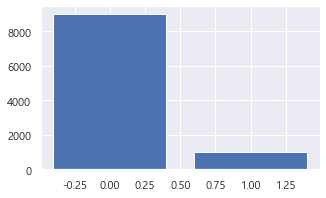

Class=1, n=1000 (10.000%)


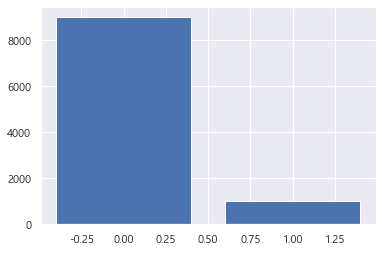

In [23]:
plt.figure(figsize = (5, 3))
count_and_plot(y_class)

In [26]:
Randomforest_Result(X_data, y_class, "언더 샘플링_원본 데이터 결과")

언더 샘플링_원본 데이터 결과 : 3-Fold CV f1 score : 0.9889


Class=0, n=1000 (50.000%)


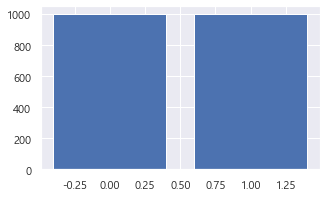

Class=1, n=1000 (50.000%)


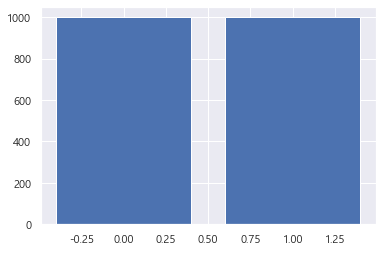

In [28]:
under_random = RandomUnderSampler(sampling_strategy = 'majority')
X_random, y_random = under_random.fit_resample(X_data, y_class)

plt.figure(figsize = (5,3))
count_and_plot(y_random)

In [29]:
Randomforest_Result(X_random, y_random, "언더 샘플링_랜덤언더 샘플링_데이터 결과")

언더 샘플링_랜덤언더 샘플링_데이터 결과 : 3-Fold CV f1 score : 0.9958


Class=0, n=2000 (66.667%)


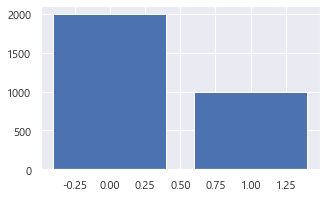

Class=1, n=1000 (33.333%)


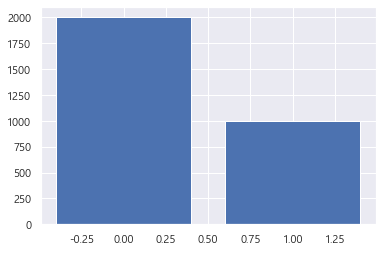

In [30]:
under_random_05 = RandomUnderSampler(sampling_strategy = 0.5)
X_random_05, y_random_05 = under_random_05.fit_resample(X_data, y_class)

plt.figure(figsize = (5, 3))
count_and_plot(y_random_05)

In [31]:
Randomforest_Result(X_random_05, y_random_05, "언더 샘플링_랜덤언더샘플링_비율:0.5_데이터 결과")

언더 샘플링_랜덤언더샘플링_비율:0.5_데이터 결과 : 3-Fold CV f1 score : 0.9935


Class=0, n=8993 (89.993%)


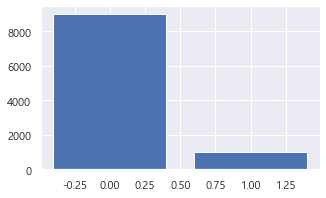

Class=1, n=1000 (10.007%)


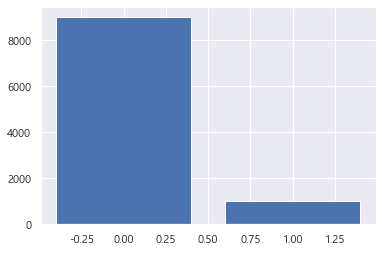

In [32]:
t1 = TomekLinks()
X_t1, y_t1 = t1.fit_resample(X_data, y_class)

plt.figure(figsize = (5, 3))
count_and_plot (y_t1)

In [33]:
Randomforest_Result(X_t1, y_t1, "언더 샘플링_토멕링크_데이터 결과")

언더 샘플링_토멕링크_데이터 결과 : 3-Fold CV f1 score : 0.9889


In [35]:
oss = OneSidedSelection(random_state = 42)
x_oss, y_oss = oss.fit_resample(X_data, y_class)

Class=0, n=7666 (88.461%)


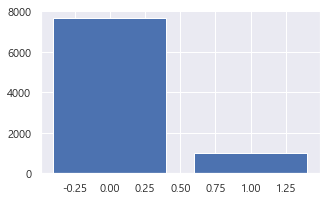

Class=1, n=1000 (11.539%)


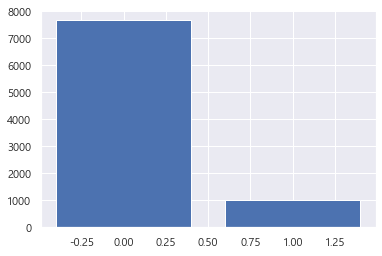

In [36]:
plt.figure(figsize = (5, 3))
count_and_plot(y_oss)

In [38]:
Randomforest_Result(x_oss, y_oss, "언더 샘플링_OSS_데이터 결과")

언더 샘플링_OSS_데이터 결과 : 3-Fold CV f1 score : 0.9889


In [39]:
X_data, y_class = make_classification(n_classes =2, class_sep =2, n_samples = 10000,
                                      n_features =20, weights =[0.9, 0.1], flip_y =0,
                                      n_clusters_per_class =1, random_state =10)

(10000, 20)
Class=0, n=9000 (90.000%)


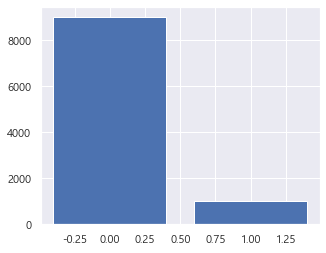

Class=1, n=1000 (10.000%)


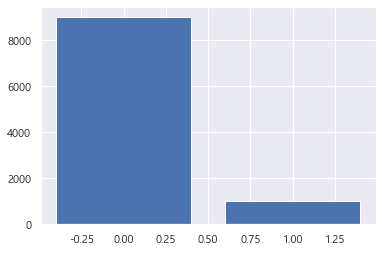

In [41]:
print(X_data.shape)
y_class.shape

plt.figure(figsize = (5, 4))
count_and_plot(y_class)

In [42]:
Randomforest_Result(X_data, y_class, "오버 샘플링_원본 데이터 결과")

오버 샘플링_원본 데이터 결과 : 3-Fold CV f1 score : 0.9892


Class=0, n=9000 (50.000%)


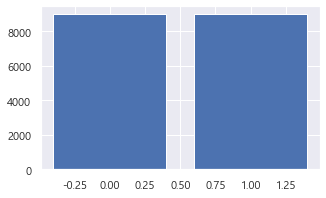

Class=1, n=9000 (50.000%)


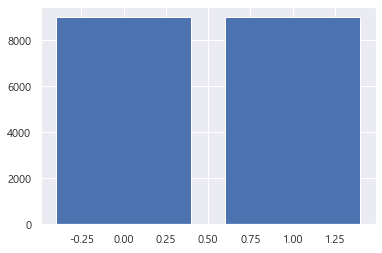

In [43]:
ros = RandomOverSampler(random_state = 42)
X_ros, y_ros = ros.fit_resample(X_data, y_class)

plt.figure(figsize=(5, 3))
count_and_plot(y_ros)

In [51]:
Randomforest_Result(X_ros, y_ros, "오버 샘플링_랜덤오버샘플링 결과")

오버 샘플링_랜덤오버샘플링 결과 : 3-Fold CV f1 score : 0.9993


Class=0, n=9000 (50.000%)


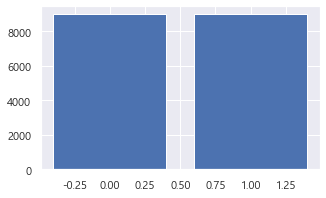

Class=1, n=9000 (50.000%)


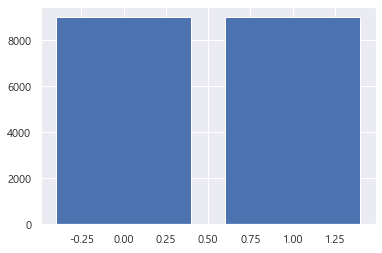

In [45]:
smote = SMOTE()
X_sm, y_sm = smote.fit_resample(X_data, y_class)

plt.figure(figsize = (5,3))
count_and_plot (y_sm)

In [46]:
Randomforest_Result(X_sm, y_sm, "오버 샘플링_SMOTE 결과")

오버 샘플링_SMOTE 결과 : 3-Fold CV f1 score : 0.9982


Class=0, n=9000 (49.972%)


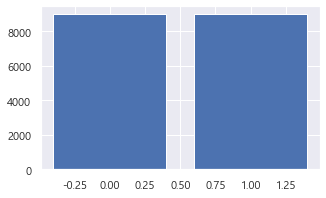

Class=1, n=9010 (50.028%)


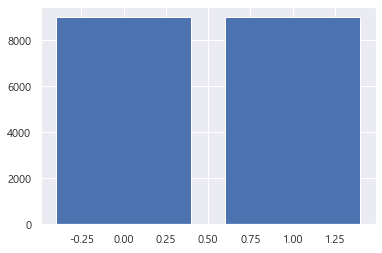

In [47]:
ada = ADASYN(random_state = 42)
X_ada, y_ada = ada.fit_resample(X_data, y_class)

plt.figure(figsize = (5, 3))
count_and_plot(y_ada)

In [48]:
Randomforest_Result(X_ada, y_ada, "오버 샘플링_ADASYN 결과")

오버 샘플링_ADASYN 결과 : 3-Fold CV f1 score : 0.9986


Class=0, n=9000 (50.000%)


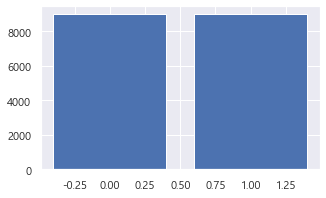

Class=1, n=9000 (50.000%)


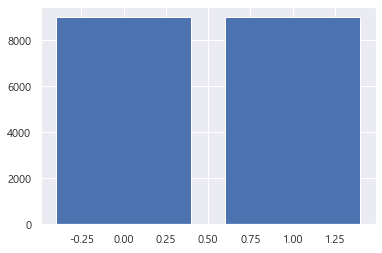

In [49]:
bor_sm = BorderlineSMOTE(random_state = 42)
X_bor_sm, y_bor_sm = bor_sm.fit_resample(X_data, y_class)

plt.figure(figsize = (5,3))
count_and_plot(y_bor_sm)

In [50]:
Randomforest_Result(X_bor_sm, y_bor_sm, "오버 샘플링_Boderline SMOTE 결과")

오버 샘플링_Boderline SMOTE 결과 : 3-Fold CV f1 score : 0.9987
